# Bird Species Classification with CNN

This notebook implements a convolutional neural network (CNN) for classifying bird species using spectrogram data.


## 1. Import Required Libraries


In [5]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


## 2. Load Dataset

Load preprocessed spectrogram data from HDF5 file.


In [6]:
with h5py.File('../data/bird_spectrograms_splits.hdf5', 'r') as f:
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_val = f['X_val'][:]
    y_val = f['y_val'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

num_classes = len(np.unique(y_train))
species_labels = [
    'amecro', 'amerob', 'bewwre', 'bkcchi', 'daejun', 'houfin',
    'houspa', 'norfli', 'rewbla', 'sonspa', 'spotow', 'whcspa'
]


## 3. Data Preprocessing

Add channel dimension and one-hot encode labels.


In [7]:
# Add channel dimension
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


## 4. Build the CNN Model

Three convolutional blocks with max pooling, global average pooling, dropout, and dense layers.


In [8]:
input_shape = X_train_cnn.shape[1:]
model = models.Sequential([
    layers.Reshape((343, 256, 1), input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mae']
)
model.summary()


c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 343, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 343, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 171, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 171, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 85, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 85, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,732 (432.55 KB)

 Trainable params: 110,732 (432.55 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model

Train for 20 epochs with batch size 32.


In [9]:
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_cnn, y_val_cat)
)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1256 - loss: 2.4621 - mae: 0.1523 - val_accuracy: 0.2511 - val_loss: 2.0684 - val_mae: 0.1434
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2645 - loss: 1.9331 - mae: 0.1378 - val_accuracy: 0.5195 - val_loss: 1.3226 - val_mae: 0.1197
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3600 - loss: 1.4812 - mae: 0.1198 - val_accuracy: 0.4156 - val_loss: 1.2552 - val_mae: 0.1150
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3772 - loss: 1.3987 - mae: 0.1172 - val_accuracy: 0.5541 - val_loss: 1.1111 - val_mae: 0.1077
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4355 - loss: 1.2383 - mae: 0.1091 - val_accuracy: 0.6277 - val_loss: 0.9841 - val_mae: 0.1000
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4684 - loss: 1.1498 - mae: 0.1048 - val_accuracy: 0.4935 - val_loss: 0.9522 - val_mae: 0.0984
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - 

## 6. Visualize Training Metrics

Plot loss, MAE, and accuracy curves.


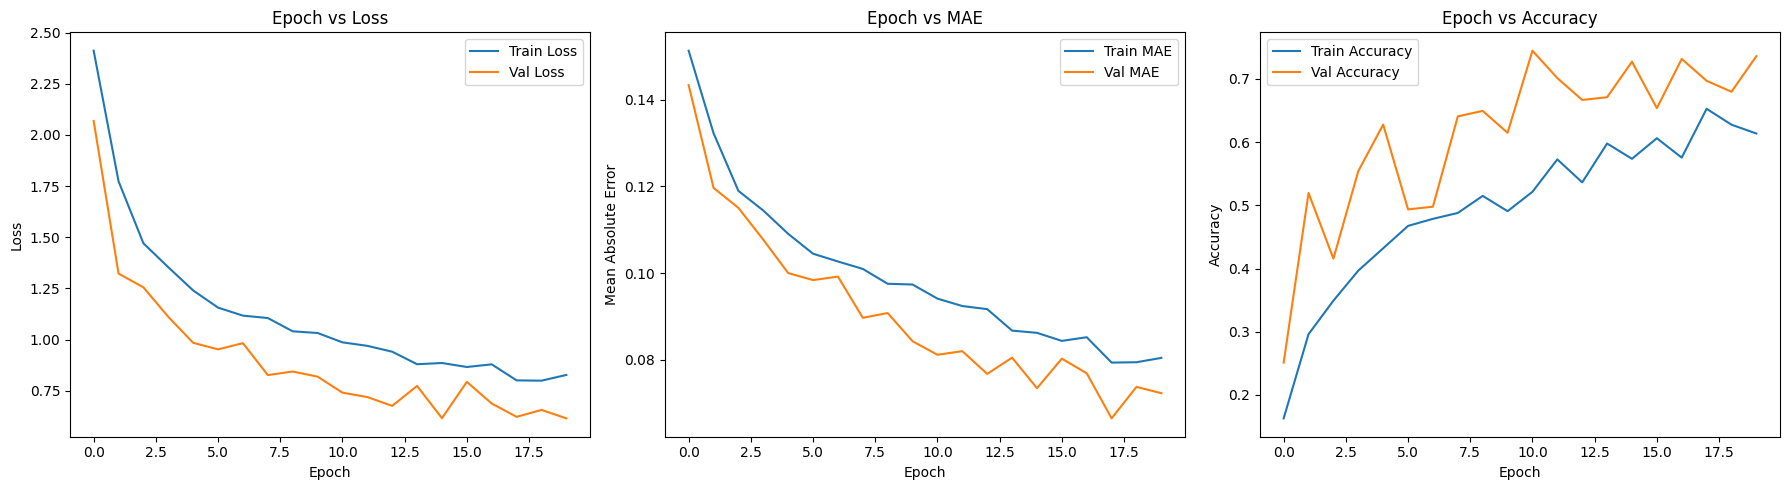

In [10]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

mae_key = 'mae' if 'mae' in history.history else 'mean_absolute_error'
val_mae_key = 'val_mae' if 'val_mae' in history.history else 'val_mean_absolute_error'
plt.subplot(1, 3, 2)
plt.plot(history.history[mae_key], label='Train MAE')
plt.plot(history.history[val_mae_key], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Epoch vs MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## 7. Evaluate Model Performance

Test set accuracy, MAE, confusion matrix, and classification report.


In [11]:
test_loss, test_acc, test_mae = model.evaluate(X_test_cnn, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.3f}, Test MAE: {test_mae:.3f}")
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=species_labels))


8/8 - 2s - 202ms/step - accuracy: 0.7056 - loss: 0.6264 - mae: 0.0717
Test accuracy: 0.706, Test MAE: 0.072
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step
Confusion Matrix:
[[11  0  0  0  0  8  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  8  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  1  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  1  0 14  0  0  0  0  0  4  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  4  0  0 15  0  0]
 [ 0  0  7  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

      amecro       1.00      0.58      0.73        19
      amerob       1.00      0.58      0.73        19
      bewwre       0.69      0.95      0.80        19
      bkcchi       0.53      1.00      0.69        20
      daejun       1.00      0.74      0.85        19
      houfin     